# 7 AutoGen - GPT-4 Turbo Vision

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

31/05/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import matplotlib.pyplot as plt
import openai
import os
import pandas as pd
import sys

from autogen import Agent, AssistantAgent, ConversableAgent
from autogen.agentchat.contrib.multimodal_conversable_agent import MultimodalConversableAgent
from autogen.code_utils import content_str
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [3]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [4]:
check_openai_version()

Installed OpenAI version: 1.30.5
[OK] OpenAI version 1.30.5 is >= 1.0.0


In [5]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

## 1. Example 1

In [6]:
config_list_4v = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": ["gpt-4TurboVision"],
    },
)

config_list_gpt4 = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    filter_dict={
        "model": [
            "gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314",
            "gpt-4-32k-v0314"
        ],
    },
)

<img src="https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true">

In [7]:
image_agent = MultimodalConversableAgent(
    name="image-explainer",
    max_consecutive_auto_reply=10,
    llm_config={
        "config_list": config_list_4v,
        "cache_seed": None,
        "temperature": 0.5,
        "max_tokens": 300
    },
)

user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    human_input_mode="NEVER",  # Try between ALWAYS or NEVER
    max_consecutive_auto_reply=0,
    code_execution_config={
        "use_docker": False
    },  # Please set use_docker=True if docker is available to run the generated code.
)

# Ask the question with an image
user_proxy.initiate_chat(
    image_agent,
    message="""What is this car?
<img https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true>.""",
)

User_proxy (to image-explainer):

What is this car?
<image>.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

The car in the image is a Ferrari Roma. The Roma is a grand touring sports car produced by the Italian manufacturer Ferrari. It features a front-mid engine, rear-wheel-drive layout, and is known for its sleek and modern design, which is a bit of a departure from the more aggressive styling of other Ferrari models.

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': 'What is this car?\n<img https://github.com/retkowsky/images/blob/master/autogen_car_1.jpg?raw=true>.', 'role': 'assistant'}, {'content': 'The car in the image is a Ferrari Roma. The Roma is a grand touring sports car produced by the Italian manufacturer Ferrari. It features a front-mid engine, rear-wheel-drive layout, and is known for its sleek and modern design, which is a bit of a departure from the more aggressive styling of other Ferrari models.', 'role': 'user'}], summary='The car in the image is a Ferrari Roma. The Roma is a grand touring sports car produced by the Italian manufacturer Ferrari. It features a front-mid engine, rear-wheel-drive layout, and is known for its sleek and modern design, which is a bit of a departure from the more aggressive styling of other Ferrari models.', cost={'usage_including_cached_inference': {'total_cost': 0.017369999999999997, 'gpt-4': {'cost': 0.017369999999999997, 'prompt_tokens': 449, 'compl

<img src="https://github.com/retkowsky/images/blob/master/autogen_car_2.jpg?raw=true">

In [8]:
# Ask the question with an image
user_proxy.send(
    message="""What is this car?
<img https://github.com/retkowsky/images/blob/master/autogen_car_2.jpg?raw=trueg>

Make a summary of these cars""",
    recipient=image_agent,
)

User_proxy (to image-explainer):

What is this car?
<image>

Make a summary of these cars

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

The car in the image is a BMW X2, a compact luxury crossover SUV. The X2 features a sporty, coupe-like design, distinguishing it from BMW's more traditional SUV models. It is part of BMW's X series of SUVs, which are known for combining the utility of an SUV with the driving dynamics for which BMW is known. The X2, in particular, is aimed at a younger demographic looking for a stylish and dynamic vehicle for urban driving.

--------------------------------------------------------------------------------


## 2. Example 2

<img src="https://github.com/retkowsky/images/blob/master/autogen_image_1.jpg?raw=true">

In [9]:
# Ask the question with an image
user_proxy.send(
    message="""Can you describe this image using hashtags and emojis?
<img https://github.com/retkowsky/images/blob/master/autogen_image_1.jpg?raw=true>

Make a summary""",
    recipient=image_agent,
)

User_proxy (to image-explainer):

Can you describe this image using hashtags and emojis?
<image>

Make a summary

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
image-explainer (to User_proxy):

#Paris2024 🇫🇷 #Olympics 🏅 #EiffelTower 🗼 #Sunset 🌇 #CityOfLight ✨ #SummerGames 🏃‍♂️🤸‍♀️🏊‍♂️ #InternationalSports 🌍 #IconicLandmarks 🏙️ #ExcitementBuilding 🎉

This image captures the essence of the upcoming 2024 Summer Olympic Games in Paris, with the iconic Eiffel Tower in the background during a beautiful sunset, symbolizing the city's readiness to host the global sporting event.

--------------------------------------------------------------------------------


## 3. Example 3

In [10]:
class FigureCreator(ConversableAgent):
    def __init__(self, n_iters=2, **kwargs):
        """
        Initializes a FigureCreator instance.

        This agent facilitates the creation of visualizations through a collaborative effort among its child agents: 
        commander, coder, and critics.

        Parameters:
            - n_iters (int, optional): The number of "improvement" iterations to run. Defaults to 2.
            - **kwargs: keyword arguments for the parent AssistantAgent.
        """
        super().__init__(**kwargs)
        self.register_reply([Agent, None],
                            reply_func=FigureCreator._reply_user,
                            position=0)
        self._n_iters = n_iters

    def _reply_user(self, messages=None, sender=None, config=None):
        if all((messages is None, sender is None)):
            error_msg = f"Either {messages=} or {sender=} must be provided."
            logger.error(error_msg)
            raise AssertionError(error_msg)
        if messages is None:
            messages = self._oai_messages[sender]

        user_question = messages[-1]["content"]

        ### Define the agents
        commander = AssistantAgent(
            name="Commander",
            human_input_mode="NEVER",
            max_consecutive_auto_reply=10,
            system_message=
            "Help me run the code, and tell other agents it is in the <img result.jpg> file location.",
            is_termination_msg=lambda x: x.get("content", "").rstrip(
            ).endswith("TERMINATE"),
            code_execution_config={
                "last_n_messages": 3,
                "work_dir": WORK_DIR,
                "use_docker": False,
            },
            llm_config=self.llm_config,
        )

        critics = MultimodalConversableAgent(
            name="Critics",
            system_message=
            """Criticize the input figure. How to replot the figure so it will be better?
            Find bugs and issues for the figure.
            Pay attention to the color, format, and presentation. Keep in mind of the reader-friendliness.
            If you think the figures is good enough, then simply say NO_ISSUES""",
            llm_config={
                "config_list": config_list_4v,
                "max_tokens": 300,
                "cache_seed": None
            },
            human_input_mode="NEVER",
            max_consecutive_auto_reply=1,
            #use_docker=False,
        )

        coder = AssistantAgent(
            name="Coder",
            llm_config=self.llm_config,
        )

        coder.update_system_message(
            coder.system_message +
            "ALWAYS save the figure in 'plot.jpg' file. Tell other agents it is in the <img plot.jpg> file location."
        )

        # Data flow begins
        commander.initiate_chat(coder, message=user_question)
        img = Image.open(os.path.join(WORK_DIR, "plot.jpg"))
        plt.imshow(img)
        plt.axis("off")  # Hide the axes
        plt.show()

        for i in range(self._n_iters):
            commander.send(
                message=f"Improve <img {os.path.join(WORK_DIR, 'plot.jpg')}>",
                recipient=critics,
                request_reply=True,
            )

            feedback = commander._oai_messages[critics][-1]["content"]
            if feedback.find("NO_ISSUES") >= 0:
                break
            commander.send(
                message=
                "Here is the feedback to your figure. Please improve! Save the result to 'final_plot.jpg'\n"
                + feedback,
                recipient=coder,
                request_reply=True,
            )
            img = Image.open(os.path.join(WORK_DIR, "final_plot.jpg"))
            plt.imshow(img)
            plt.axis("off")
            plt.show()

        return True, os.path.join(WORK_DIR, "final_plot.jpg")

In [11]:
gpt4_llm_config = {"config_list": config_list_gpt4, "cache_seed": None}

In [12]:
csv_url = "https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv"

df = pd.read_csv(csv_url)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [13]:
df.shape

(1461, 6)

In [14]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


User (to Figure Creator~):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, the low temperature should be blue.
All the labels should be visible. 


--------------------------------------------------------------------------------
Commander (to Coder):


Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, the low temperature should be blue.
All the labels should be visible. 


--------------------------------------------------------------------------------
Coder (to Commander):

To solve this task, we will use the pandas and matplotlib libraries of python.

First, we will read the data stored in the csv file using pandas.
Then, we extract the 'date', 'temp_max' an

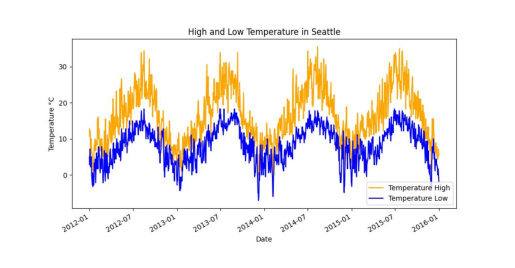

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Critics (to Commander):

This chart depicting the high and low temperatures in Seattle could be improved with the following suggestions:

1. Text clarity: Increase the size and clarity of the text labels for the axes and the title to make them more readable.
2. Axes labels: Provide clearer labeling for the x-axis to ensure that dates are easily readable and understood. Consider rotating the date labels or altering their formatting to prevent overlap and improve legibility.
3. Gridlines: Adding horizontal gridlines might help in accurately reading the temperatures at a glance.
4. Color choice: The colors should be easy to distinguish for those with color vision deficiencies. Consider using a colorblind-friendly palette.
5. Legend: Place the legend in an area where it does not overlap with the data points, perhaps outside the chart area or above it for better visibil

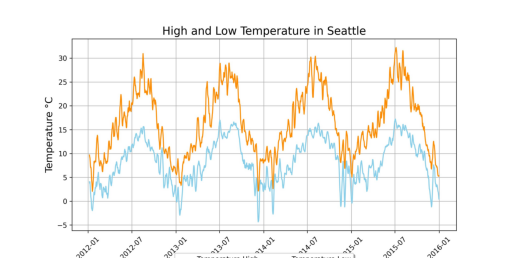

Commander (to Critics):

Improve <image>

--------------------------------------------------------------------------------
Commander (to Coder):

Here is the feedback to your figure. Please improve! Save the result to 'final_plot.jpg'
Improve <img workdir/plot.jpg>

--------------------------------------------------------------------------------
Coder (to Commander):

I apologize, but I cannot see your image or the feedback you want me to address due to my current capabilities as an AI. However, I understand that there might be some room for improvement.

Here are a few general tips for improving a plot:

1. Adjust the size of the figure to make sure all data and labels fit well and are visible.
2. Make sure the labels for the axes are descriptive enough to understand what's represented on each axis.
3. The title should be informative.
4. If the lines overlap, you might want to consider choosing different styles for the lines.
5. Maintain a color scheme that is appealing to the eye and

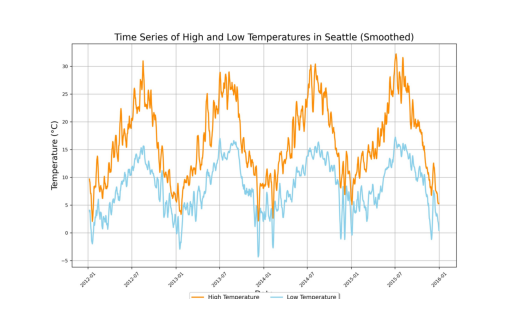

Figure Creator~ (to User):

workdir/final_plot.jpg

--------------------------------------------------------------------------------


ChatResult(chat_id=None, chat_history=[{'content': '\nPlot a figure by using the data from:\nhttps://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv\n\nI want to show both temperature high and low in a chart. The high temperature should be orange, the low temperature should be blue.\nAll the labels should be visible. \n', 'role': 'assistant'}, {'content': 'workdir/final_plot.jpg', 'role': 'user'}], summary='workdir/final_plot.jpg', cost={'usage_including_cached_inference': {'total_cost': 0}, 'usage_excluding_cached_inference': {'total_cost': 0}}, human_input=[])

In [15]:
creator = FigureCreator(name="Figure Creator~", llm_config=gpt4_llm_config)

user_proxy = autogen.UserProxyAgent(
    name="User",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=0,
    code_execution_config={"use_docker": False})

user_proxy.initiate_chat(
    creator,
    message="""
Plot a figure by using the data from:
https://raw.githubusercontent.com/vega/vega/main/docs/data/seattle-weather.csv

I want to show both temperature high and low in a chart. The high temperature should be orange, 
the low temperature should be blue. All the labels should be visible. 
""",
)

### First plot

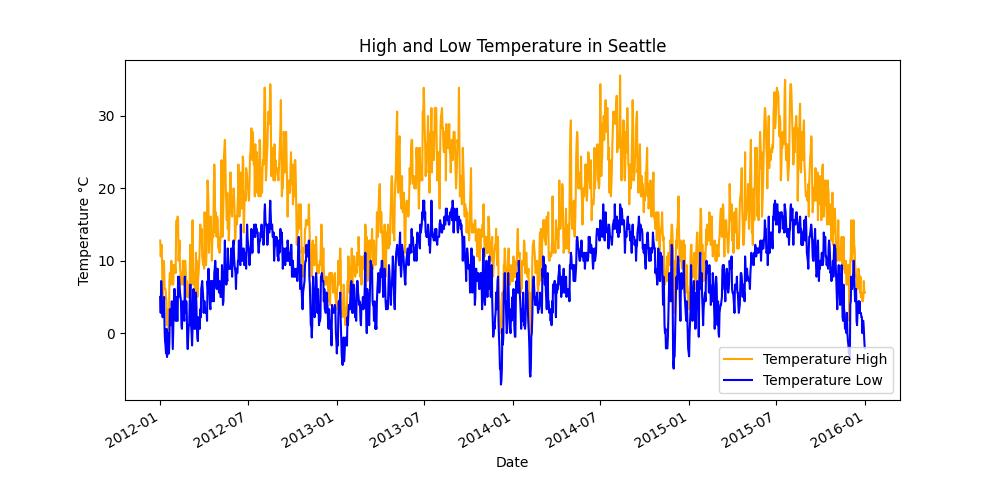

In [16]:
img = Image.open(os.path.join(WORK_DIR, 'plot.jpg'))
img

### Enhanced plot

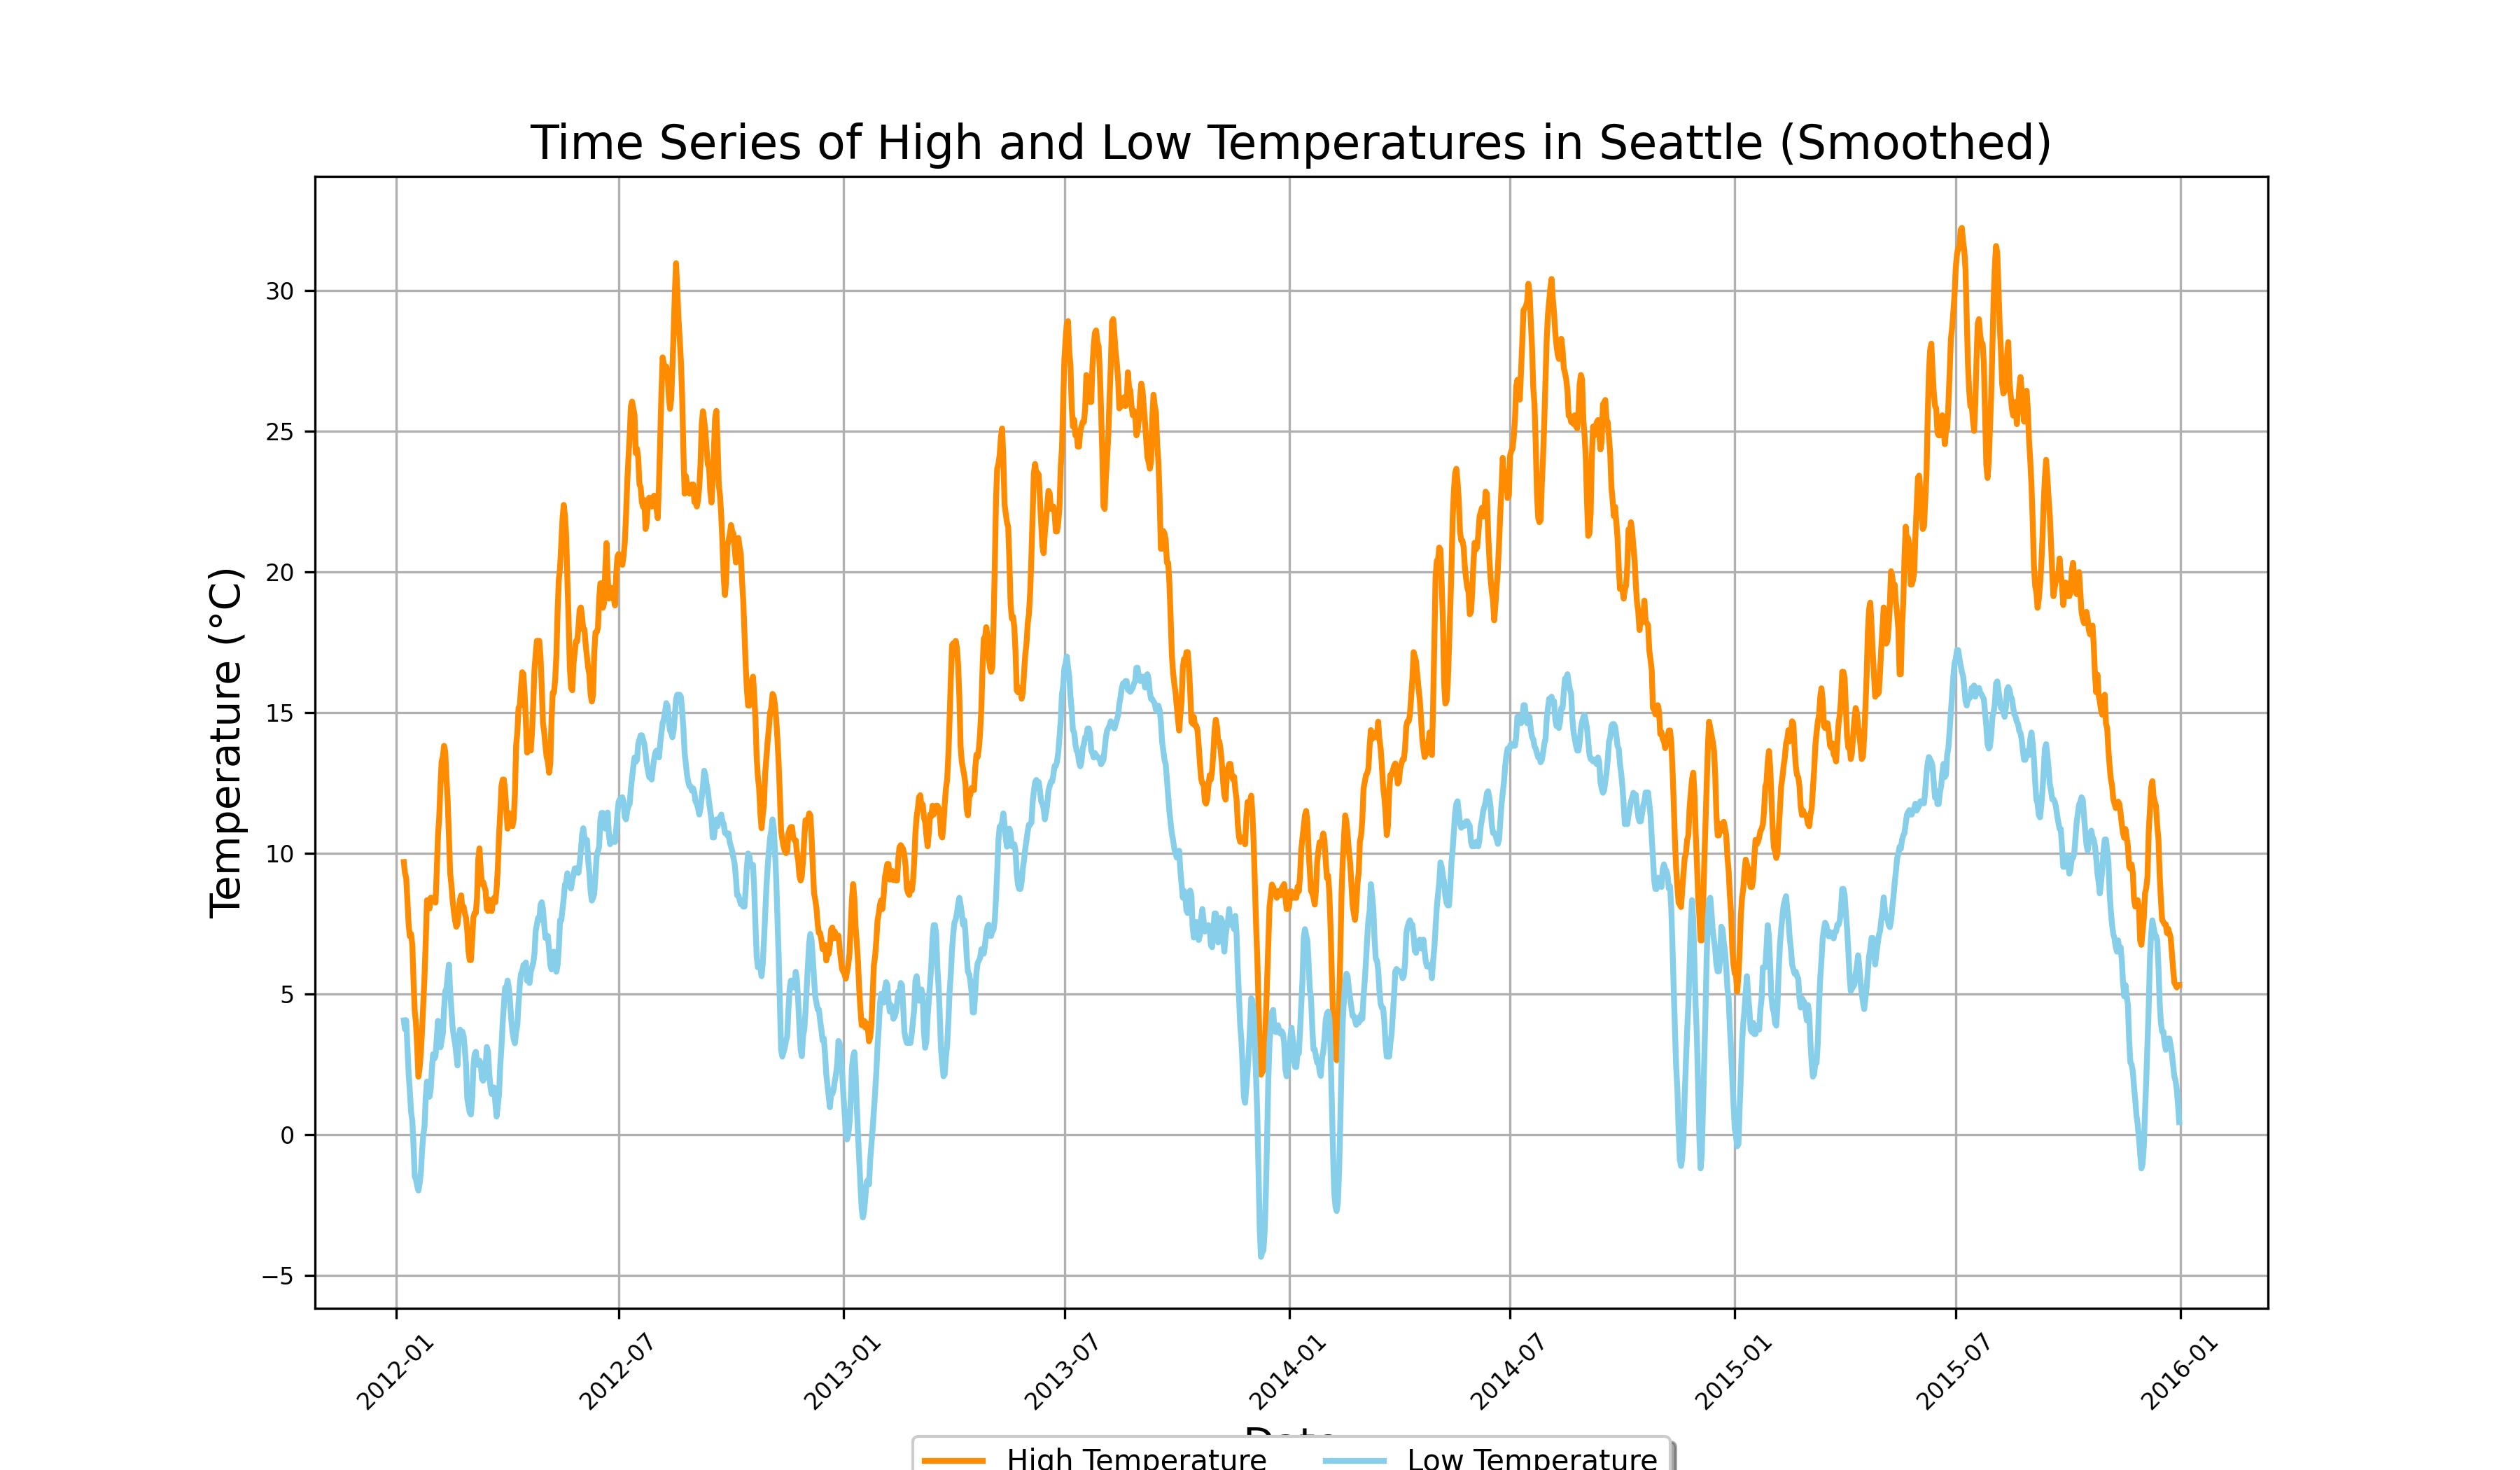

In [17]:
img = Image.open(os.path.join(WORK_DIR, 'final_plot.jpg'))
img

### Side by side

In [20]:
def side_by_side_images(imagefile1, imagefile2):
    """
    Side by side images
    """
    # Display images side by side
    image1 = plt.imread(imagefile1)
    image2 = plt.imread(imagefile2)
    NUM_ROWS = 1
    IMGS_IN_ROW = 2
    f, ax = plt.subplots(NUM_ROWS, IMGS_IN_ROW, figsize=(15, 7))
    ax[0].imshow(image1)
    ax[1].imshow(image2)
    ax[0].set_title('1. Initial plot')
    ax[1].set_title('2. Enhanced plot')
    plt.tight_layout()
    plt.show()

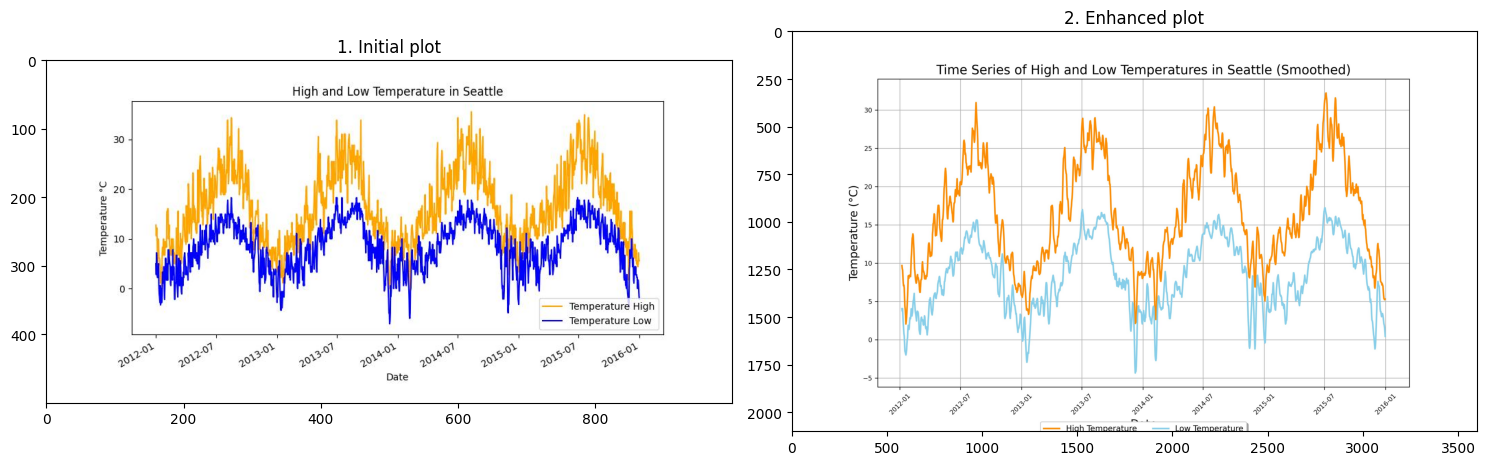

In [21]:
side_by_side_images(
    os.path.join(WORK_DIR, 'plot.jpg'),
    os.path.join(WORK_DIR, 'final_plot.jpg')
)

In [25]:
!ls $WORK_DIR/*.jpg -lh

-rwxrwxrwx 1 root root 420K Jun  4 15:20 workdir/final_plot.jpg
-rwxrwxrwx 1 root root  61K Jun  4 15:17 workdir/plot.jpg
